In [ ]:
# https://www.slideshare.net/BAINIDA/deepcut-thai-word-segmentation-nida

# Load Dataset

In [1]:
from glob import glob
import random

In [382]:
files = glob('../BEST I Corpus/*/*')
print('Number of files: ', len(files))

Number of files:  506


In [383]:
nb_files_sample = 100
files_sample = random.choices(files, k=nb_files_sample)
print('Number of sample files: ', len(files_sample))

Number of sample files:  100


In [384]:
files_sample  # display file list

['../BEST I Corpus\\article\\article_00136.txt',
 '../BEST I Corpus\\encyclopedia\\encyclopedia_00086.txt',
 '../BEST I Corpus\\article\\article_00129.txt',
 '../BEST I Corpus\\article\\article_00155.txt',
 '../BEST I Corpus\\article\\article_00094.txt',
 '../BEST I Corpus\\article\\article_00035.txt',
 '../BEST I Corpus\\article\\article_00020.txt',
 '../BEST I Corpus\\news\\news_00019.txt',
 '../BEST I Corpus\\article\\article_00175.txt',
 '../BEST I Corpus\\encyclopedia\\encyclopedia_00091.txt',
 '../BEST I Corpus\\article\\article_00177.txt',
 '../BEST I Corpus\\encyclopedia\\encyclopedia_00040.txt',
 '../BEST I Corpus\\article\\article_00165.txt',
 '../BEST I Corpus\\news\\news_00072.txt',
 '../BEST I Corpus\\novel\\novel_00018.txt',
 '../BEST I Corpus\\novel\\novel_00003.txt',
 '../BEST I Corpus\\article\\article_00162.txt',
 '../BEST I Corpus\\novel\\novel_00098.txt',
 '../BEST I Corpus\\article\\article_00070.txt',
 '../BEST I Corpus\\novel\\novel_00005.txt',
 '../BEST I Corpus

# Preprocessing

In [385]:
def replace(text, wordlist):
    for new_word, list_ in wordlist.items():
        for old_word in list_:
            text = text.replace(old_word.lower(), new_word)
    return text

    
def preprocessing(text, wordlist):
    text = text.lower()  # to lower-case
    text = replace(text, wordlist)
    return text

In [386]:
texts = []
for fpath in files_sample:
    with open(fpath, mode='r', encoding="utf8") as file:
        text = file.read()  # read file
        texts.append(text)

In [387]:
# texts = ['doc1', 'doc2', 'doc3', '....', 'doc n']

In [388]:
texts[0][:1000]  # sameple texts

'ความ|เชื่อ|และ|วิถี|ชีวิต|ของ|พี่น้อง|มุสลิม|\n3| |R| |กับ|การ|ฝ่า|ข้ามกำแพง|ไป|เพื่อ|สันติภาพ|\n<NE>ดร.สุกรี หลังปูเต๊ะ</NE>|\nคณบดี|<NE>คณะศิลปศาสตร์</NE>| |<NE>วิทยาลัยอิสลามยะลา</NE>|\nหมายเหตุ|\nความ|เชื่อ|และ|วิถี|ชีวิต|ของ|พี่น้อง|มุสลิม|\nบทความ|ชิ้น|นี้| |มา|จาก|จาก|การ|สัมมนา|พระสงฆ์| |นัก|บวช| |และ|ฆราวาส| |ประจำ|ปี| |๒๐๐๕|\nซึ่ง|จัด|โดย| |<NE>สังฆมณฑลสุราษฎร์ธานี</NE>| |เมื่อ|วัน|พุธ|ที่| |๒๖| |ตุลาคม| |๒๕๔๘|\nณ| |<NE>บ้านชุมพาบาล</NE>| |<NE>อ.เมือง</NE>| |<NE>จ.สุราษฎร์ธานี</NE>|\nเพื่อ|ให้|พระสงฆ์| |นัก|บวช| |และ|พี่น้อง|คริสตชน| |ได้|ร่วม|เรียนรู้| |เข้าใจ|และ|สมานฉันท์|\nต่อ|สถานการณ์|ปัญหา|ชาย|แดน|ภาค|ใต้|\n(|บทความ|เพื่อ|ประโยชน์|ทาง|การ|ศึกษา|)|\nบทความ|ฟรี| |<NE>มหาวิทยาลัยเที่ยงคืน</NE>| |ลำดับ|ที่| |743|\nเผยแพร่|บน|เว็บไซต์|นี้|ครั้ง|แรก|เมื่อ|วัน|ที่| |๑๘| |พฤศจิกายน| |๒๕๔๘|\n(|บทความ|ทั้งหมด|ยาว|ประมาณ| |17| |หน้า|กระดาษ| |A|4|)|\nโครงสร้าง|ทาง|สังคม|ที่|มี|อยู่|ใน| |3| |จังหวัด|ชาย|แดน|ภาค|ใต้|\nเรื่อง|โครงสร้าง|ทาง|สังคม|ใน| |3| |จังหวัด|ชาย|แดน|ภาค|ใต้| |ซึ

In [389]:
wordlist = {
    '': ['<AB>', '</AB>', '<NE>', '</NE>', '\n'],
}

texts = [preprocessing(text, wordlist) for text in texts]

In [390]:
texts[0][:100]  # sameple texts

'ความ|เชื่อ|และ|วิถี|ชีวิต|ของ|พี่น้อง|มุสลิม|3| |r| |กับ|การ|ฝ่า|ข้ามกำแพง|ไป|เพื่อ|สันติภาพ|ดร.สุกร'

# Create Dictionary

In [391]:
# Merge text for create unique chars dictionary
merge_texts = []
for text in texts:
    merge_texts += text

In [392]:
CHARS = sorted(list(set(merge_texts)))
CHAR_INDICES = dict((c, i) for i, c in enumerate(CHARS))
CHAR_INDICES['<pad>'] = len(CHARS)

INDICES_CHAR = dict((i, c) for i, c in enumerate(CHAR_INDICES))

print(f'Unique chars: {len(INDICES_CHAR)}')

Unique chars: 143


In [393]:
INDICES_CHAR

{0: ' ',
 1: '!',
 2: '"',
 3: '%',
 4: '&',
 5: "'",
 6: '(',
 7: ')',
 8: '*',
 9: '+',
 10: ',',
 11: '-',
 12: '.',
 13: '/',
 14: '0',
 15: '1',
 16: '2',
 17: '3',
 18: '4',
 19: '5',
 20: '6',
 21: '7',
 22: '8',
 23: '9',
 24: ':',
 25: ';',
 26: '<',
 27: '=',
 28: '>',
 29: '?',
 30: '@',
 31: '[',
 32: '\\',
 33: ']',
 34: '_',
 35: 'a',
 36: 'b',
 37: 'c',
 38: 'd',
 39: 'e',
 40: 'f',
 41: 'g',
 42: 'h',
 43: 'i',
 44: 'j',
 45: 'k',
 46: 'l',
 47: 'm',
 48: 'n',
 49: 'o',
 50: 'p',
 51: 'q',
 52: 'r',
 53: 's',
 54: 't',
 55: 'u',
 56: 'v',
 57: 'w',
 58: 'x',
 59: 'y',
 60: 'z',
 61: '|',
 62: 'ก',
 63: 'ข',
 64: 'ค',
 65: 'ฆ',
 66: 'ง',
 67: 'จ',
 68: 'ฉ',
 69: 'ช',
 70: 'ซ',
 71: 'ฌ',
 72: 'ญ',
 73: 'ฎ',
 74: 'ฏ',
 75: 'ฐ',
 76: 'ฑ',
 77: 'ฒ',
 78: 'ณ',
 79: 'ด',
 80: 'ต',
 81: 'ถ',
 82: 'ท',
 83: 'ธ',
 84: 'น',
 85: 'บ',
 86: 'ป',
 87: 'ผ',
 88: 'ฝ',
 89: 'พ',
 90: 'ฟ',
 91: 'ภ',
 92: 'ม',
 93: 'ย',
 94: 'ร',
 95: 'ฤ',
 96: 'ล',
 97: 'ว',
 98: 'ศ',
 99: 'ษ',
 100: 'ส'

# Create Dataset

In [394]:
import numpy as np

In [395]:
# def create_dataset(texts, look_back=20):
#     X, y = [], []
#     for text in texts:
#         data = [CHAR_INDICES['<pad>']] * look_back
#         for i in range(len(text)-1):
#             current_char = text[i]
#             next_char = text[i+1]
            
#             if current_char == '|':
#                 continue
            
#             data = data[1:] + [CHAR_INDICES[current_char]]  # X data
#             target = 1 if next_char == '|' else 0  # y data
            
#             X.append(data)
#             y.append(target)
#     return X, y

In [396]:
def create_dataset(texts, look_back=20):
    X, y = [], []
    for text in texts:
        text = '|' + text
        data = [CHAR_INDICES['<pad>']] * look_back
        for i in range(1, len(text)):
            current_char = text[i]
            before_char = text[i-1]
            
            if current_char == '|':
                continue
            
            data = data[1:] + [CHAR_INDICES[current_char]]  # X data
            target = 1 if before_char == '|' else 0  # y data
            
            X.append(data)
            y.append(target)
        y[-1] = 1  # end text is '|'
    return X, y

In [397]:
X, y = create_dataset(texts)

In [398]:
sample = 30
print(*[f'{data}  :  {target}' for data, target in zip(X[:sample], y[:sample])], sep='\n')

[142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 64]  :  1
[142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 64, 97]  :  0
[142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 64, 97, 108]  :  0
[142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 64, 97, 108, 92]  :  0
[142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 64, 97, 108, 92, 117]  :  1
[142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 64, 97, 108, 92, 117, 69]  :  0
[142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 64, 97, 108, 92, 117, 69, 113]  :  0
[142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 64, 97, 108, 92, 117, 69, 113, 125]  :  0
[142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 64, 97, 108, 92, 117, 69, 113, 125, 103]  :  0
[142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 64, 97, 108, 

In [399]:
def encode_data(X, y):
    sequence_len = len(X[0])
    encode_X = np.zeros((len(X), sequence_len, len(INDICES_CHAR)), dtype=np.bool)
    encode_y = np.zeros((len(y), 2), dtype=np.bool)
    for i, (data, target) in enumerate(zip(X, y)):
        for t, char in enumerate(data):
            encode_X[i, t, char] = 1
        encode_y[i, target] = 1
        
    return encode_X, encode_y

In [400]:
X, y = encode_data(X, y)

In [401]:
X[0][0], y[0]  # sample data encoding

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
      

# Train-Test Split

In [402]:
def train_test_split(X, y, test_size=0.3):
    
    # split into train and test sets
    test_size = int(len(X) * test_size)
    train_size = len(X) - test_size
    
    X_train, X_test = X[:train_size], X[train_size:len(X)]
    y_train, y_test = y[:train_size], y[train_size:len(y)]
    
    return X_train, X_test, y_train, y_test

In [403]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [404]:
# data shape
print('Dataset'.center(20,'-'))
print('X shape: ', X.shape)
print('y shape: ', y.shape)

print('Train'.center(20,'-'))
print('X shape: ', X_train.shape)
print('y shape: ', y_train.shape)

print('Test'.center(20,'-'))
print('X shape: ', X_test.shape)
print('y shape: ', y_test.shape)

------Dataset-------
X shape:  (3913164, 20, 143)
y shape:  (3913164, 2)
-------Train--------
X shape:  (2739215, 20, 143)
y shape:  (2739215, 2)
--------Test--------
X shape:  (1173949, 20, 143)
y shape:  (1173949, 2)


# Create Model

In [405]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Dropout, Bidirectional
from keras.utils.vis_utils import plot_model
from IPython.display import Image

In [406]:
def define_model(input_shape, n_uits=256):
    model = Sequential()
    model.add(
        Bidirectional(LSTM(n_uits, input_shape=input_shape,
                           return_sequences=False),
                      merge_mode='sum',
                      weights=None,
                      input_shape=input_shape))
    model.add(Dense(n_uits, activation='linear'))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])  # compile
    
    print('Total params: ', model.count_params())
    return model

Total params:  885506


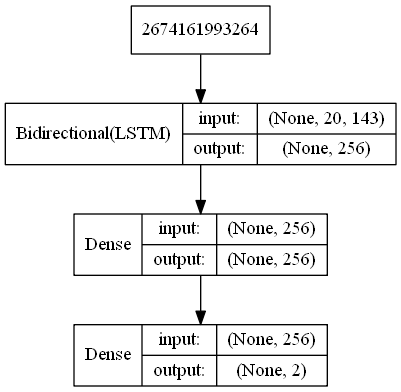

In [407]:
input_shape = X.shape[1:]
model = define_model(input_shape)  # define model

# plot model
image_name = 'model.png'
plot_model(model, image_name, show_shapes=True, show_layer_names=False)
display(Image(filename=image_name))

In [408]:
from livelossplot import PlotLossesKeras

callbacks_list = [PlotLossesKeras()]  # Callback config

In [409]:
# training

history = model.fit(X, y, 
                    validation_split=0.2, 
                    batch_size=1024,
                    epochs=100,
                    shuffle=True,
                    callbacks=callbacks_list,
                    verbose=1)

Train on 3130531 samples, validate on 782633 samples
Epoch 1/100
  20480/3130531 [..............................] - ETA: 3:53:38 - loss: 0.5788 - acc: 0.7174

KeyboardInterrupt: 

# Save to File

In [ ]:
import json

def to_json(fname, data_dict):
    json_data = json.dumps(data_dict)
    with open(fname,'w') as file:
        file.write(json_data)

In [ ]:
# save model
model.save('model.h5')

# save dictionary
to_json('CHAR_INDICES.json', CHAR_INDICES)
to_json('INDICES_CHAR.json', INDICES_CHAR)

# App

In [336]:
def pred_preprocessing(text, sequence_len=20):
    X = []
    data = [CHAR_INDICES['<pad>']] * sequence_len
    for char in text:
        data = data[1:] + [CHAR_INDICES[char]]  # X data
        X.append(data)
        
    # data encoding
    encode_X = np.zeros((len(X), sequence_len, len(CHAR_INDICES)), dtype=np.bool)
    for i, data in enumerate(X):
        for t, char in enumerate(data):
            encode_X[i, t, char] = 1
        
    return encode_X

In [338]:
# # end index split

# def word_tokenize(text):
#     input_text_encode = preprocess_text(text)
#     preds = model.predict(input_text_encode)
#     class_ = [np.argmax(pred) for pred in preds]
#     cut_indexs = [i for i, value in enumerate(class_) if value == 1]
#     cut_indexs = [-1] + cut_indexs
    
#     result = []
#     for i in range(len(cut_indexs)-1):
#         seg = text[cut_indexs[i]+1:cut_indexs[i+1]+1]
#         result.append(seg)
#     return result

In [374]:
# front index split

def word_tokenize(text):
    input_text_encode = pred_preprocessing(text)
    preds = model.predict(input_text_encode)
    class_ = [np.argmax(pred) for pred in preds] + [1]
    cut_indexs = [i for i, value in enumerate(class_) if value == 1]
    words = [text[cut_indexs[i]:cut_indexs[i+1]] for i in range(len(cut_indexs)-1)]
    return words

In [337]:
input_text = [
    'สวัสดีครับผมชื่ออะไรก็ได้โตแล้ว'
]

In [375]:
text = texts[0].replace('|', '')

words = word_tokenize(text)
print(words)

['การ', 'ข่มขืน', 'โดย', 'กระบวนการ', 'ยุติธรรม', 'นัทมน คงเจริญ', ' ', 'หัวหน้า', 'ศูนย์สตรีศึกษา', ' ', 'คณะสังคมศาสตร์', ' ', 'มหาวิทยาลัยเชียงใหม่', 'สมชาย ปรีชาศิลปกุล', ' ', 'สาขา', 'นิติศาสตร์', ' ', 'คณะสังคมศาสตร์', ' ', 'มหาวิทยาลัยเชียงใหม่', '(', 'บทความนี้', 'ยาว', 'ประมาณ', ' ', '7', ' ', 'หน้า', 'กระดาษ', ' ', 'a', '4', ')', 'ประมวล', 'กฎหมาย', 'อาญา', ' ', 'มาตรา', ' ', '276', ':', ' ', 'ผู้', 'ใด', 'ข่มขืน', 'กระทำ', 'ชำเรา', 'หญิง', 'ซึ่ง', 'มิ', 'ใช่', 'ภริยา', 'ของ', 'ตน', ' ', 'โดย', 'ขู่เข็ญ', 'ด้วย', 'ประการ', 'ใด', 'ๆ', ' ', 'โดย', 'ใช้', 'กำลัง', 'ประทุษร้าย', ' ', 'โดย', 'หญิง', 'อยู่', 'ใน', 'ภาวะ', 'ที่', 'ไม่', 'สามารถ', 'ขัดขืน', 'ได้', ' ', 'หรือ', 'โดย', 'การ', 'ทำ', 'ให้', 'หญิง', 'เข้าใจ', 'ผิด', 'ว่า', 'ตน', 'เป็น', 'บุคคล', 'อื่น', ' ', 'ต้อง', 'ระวาง', 'โทษ', 'จำ', 'คุก', 'ตั้งแต่', 'สี่', 'ปี', 'ถึง', 'ยี่', 'สิบ', 'ปี', ' ', 'และ', 'ปรับ', 'ตั้งแต่', 'แปด', 'พัน', 'บาท', 'ถึง', 'สี่', 'หมื่น', 'บาท', '1', '.', ' ', 'เกริ่น', 'นำ', 'การ', 'ข่มขืน',